In [52]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from pingouin import compute_effsize, plot_paired
import numpy as np
import seaborn as sns
from glob import glob

In [54]:
dataset_re = re.compile("data/([^\.]+)\.smi")

In [66]:
dataset_list = []
for filename in glob("data/*.smi"):
    dataset = dataset_re.findall(filename)[0]
    num_lines = len(open(filename).readlines())
    dataset_list.append([dataset, num_lines])
dataset_df = pd.DataFrame(dataset_list,columns=["dataset","num_mols"])

In [3]:
df = pd.read_csv("delta_data.csv")

In [4]:
df

,cycle,r2_single,r2_delta,rmse_single,rmse_delta,filename
0,0,0.407475,0.652839,1.362384,1.042825,data/A2a.smi
1,1,0.627726,0.651728,1.288890,1.246647,data/A2a.smi
2,2,0.320078,0.332750,1.158246,1.147402,data/A2a.smi
3,3,0.519141,0.470060,1.277251,1.340852,data/A2a.smi
4,4,0.664373,0.748484,1.046239,0.905703,data/A2a.smi
...,...,...,...,...,...,...
145,5,0.664134,0.715887,0.943293,0.867580,data/opioid.smi
146,6,0.708523,0.781729,0.920903,0.796911,data/opioid.smi
147,7,0.698063,0.731080,0.937911,0.885147,data/opioid.smi
148,8,0.687257,0.747061,0.926035,0.832801,data/opioid.smi


In [16]:
dataset_re = re.compile("data/([^\.]+)\.smi")
df['dataset'] = [dataset_re.findall(x)[0] for x in df.filename]

In [75]:
dataset_df = dataset_df.query("dataset in @df.dataset.unique()").copy()
dataset_df.sort_values("num_mols",inplace=True)
dataset_df.dataset

22               A2a
19          Dopamine
3               ABL1
2      Dihydrofolate
8           Carbonic
0             opioid
10       Cannabinoid
14             B-raf
23       Coagulation
13               LCK
11    Glucocorticoid
9              COX-1
12         Monoamine
21           Caspase
4           Estrogen
Name: dataset, dtype: object

In [20]:
r2_melt_df = pd.melt(df[["cycle","dataset","r2_single","r2_delta"]],id_vars=["cycle","dataset"])
r2_melt_df.columns = ["cycle","dataset","method","r2"]
r2_melt_df.head()

,cycle,dataset,method,r2
0,0,A2a,r2_single,0.407475
1,1,A2a,r2_single,0.627726
2,2,A2a,r2_single,0.320078
3,3,A2a,r2_single,0.519141
4,4,A2a,r2_single,0.664373


In [82]:
dataset_dict = dict(dataset_df.values)

In [49]:
sns.set_style('whitegrid')
sns.set_context('talk')

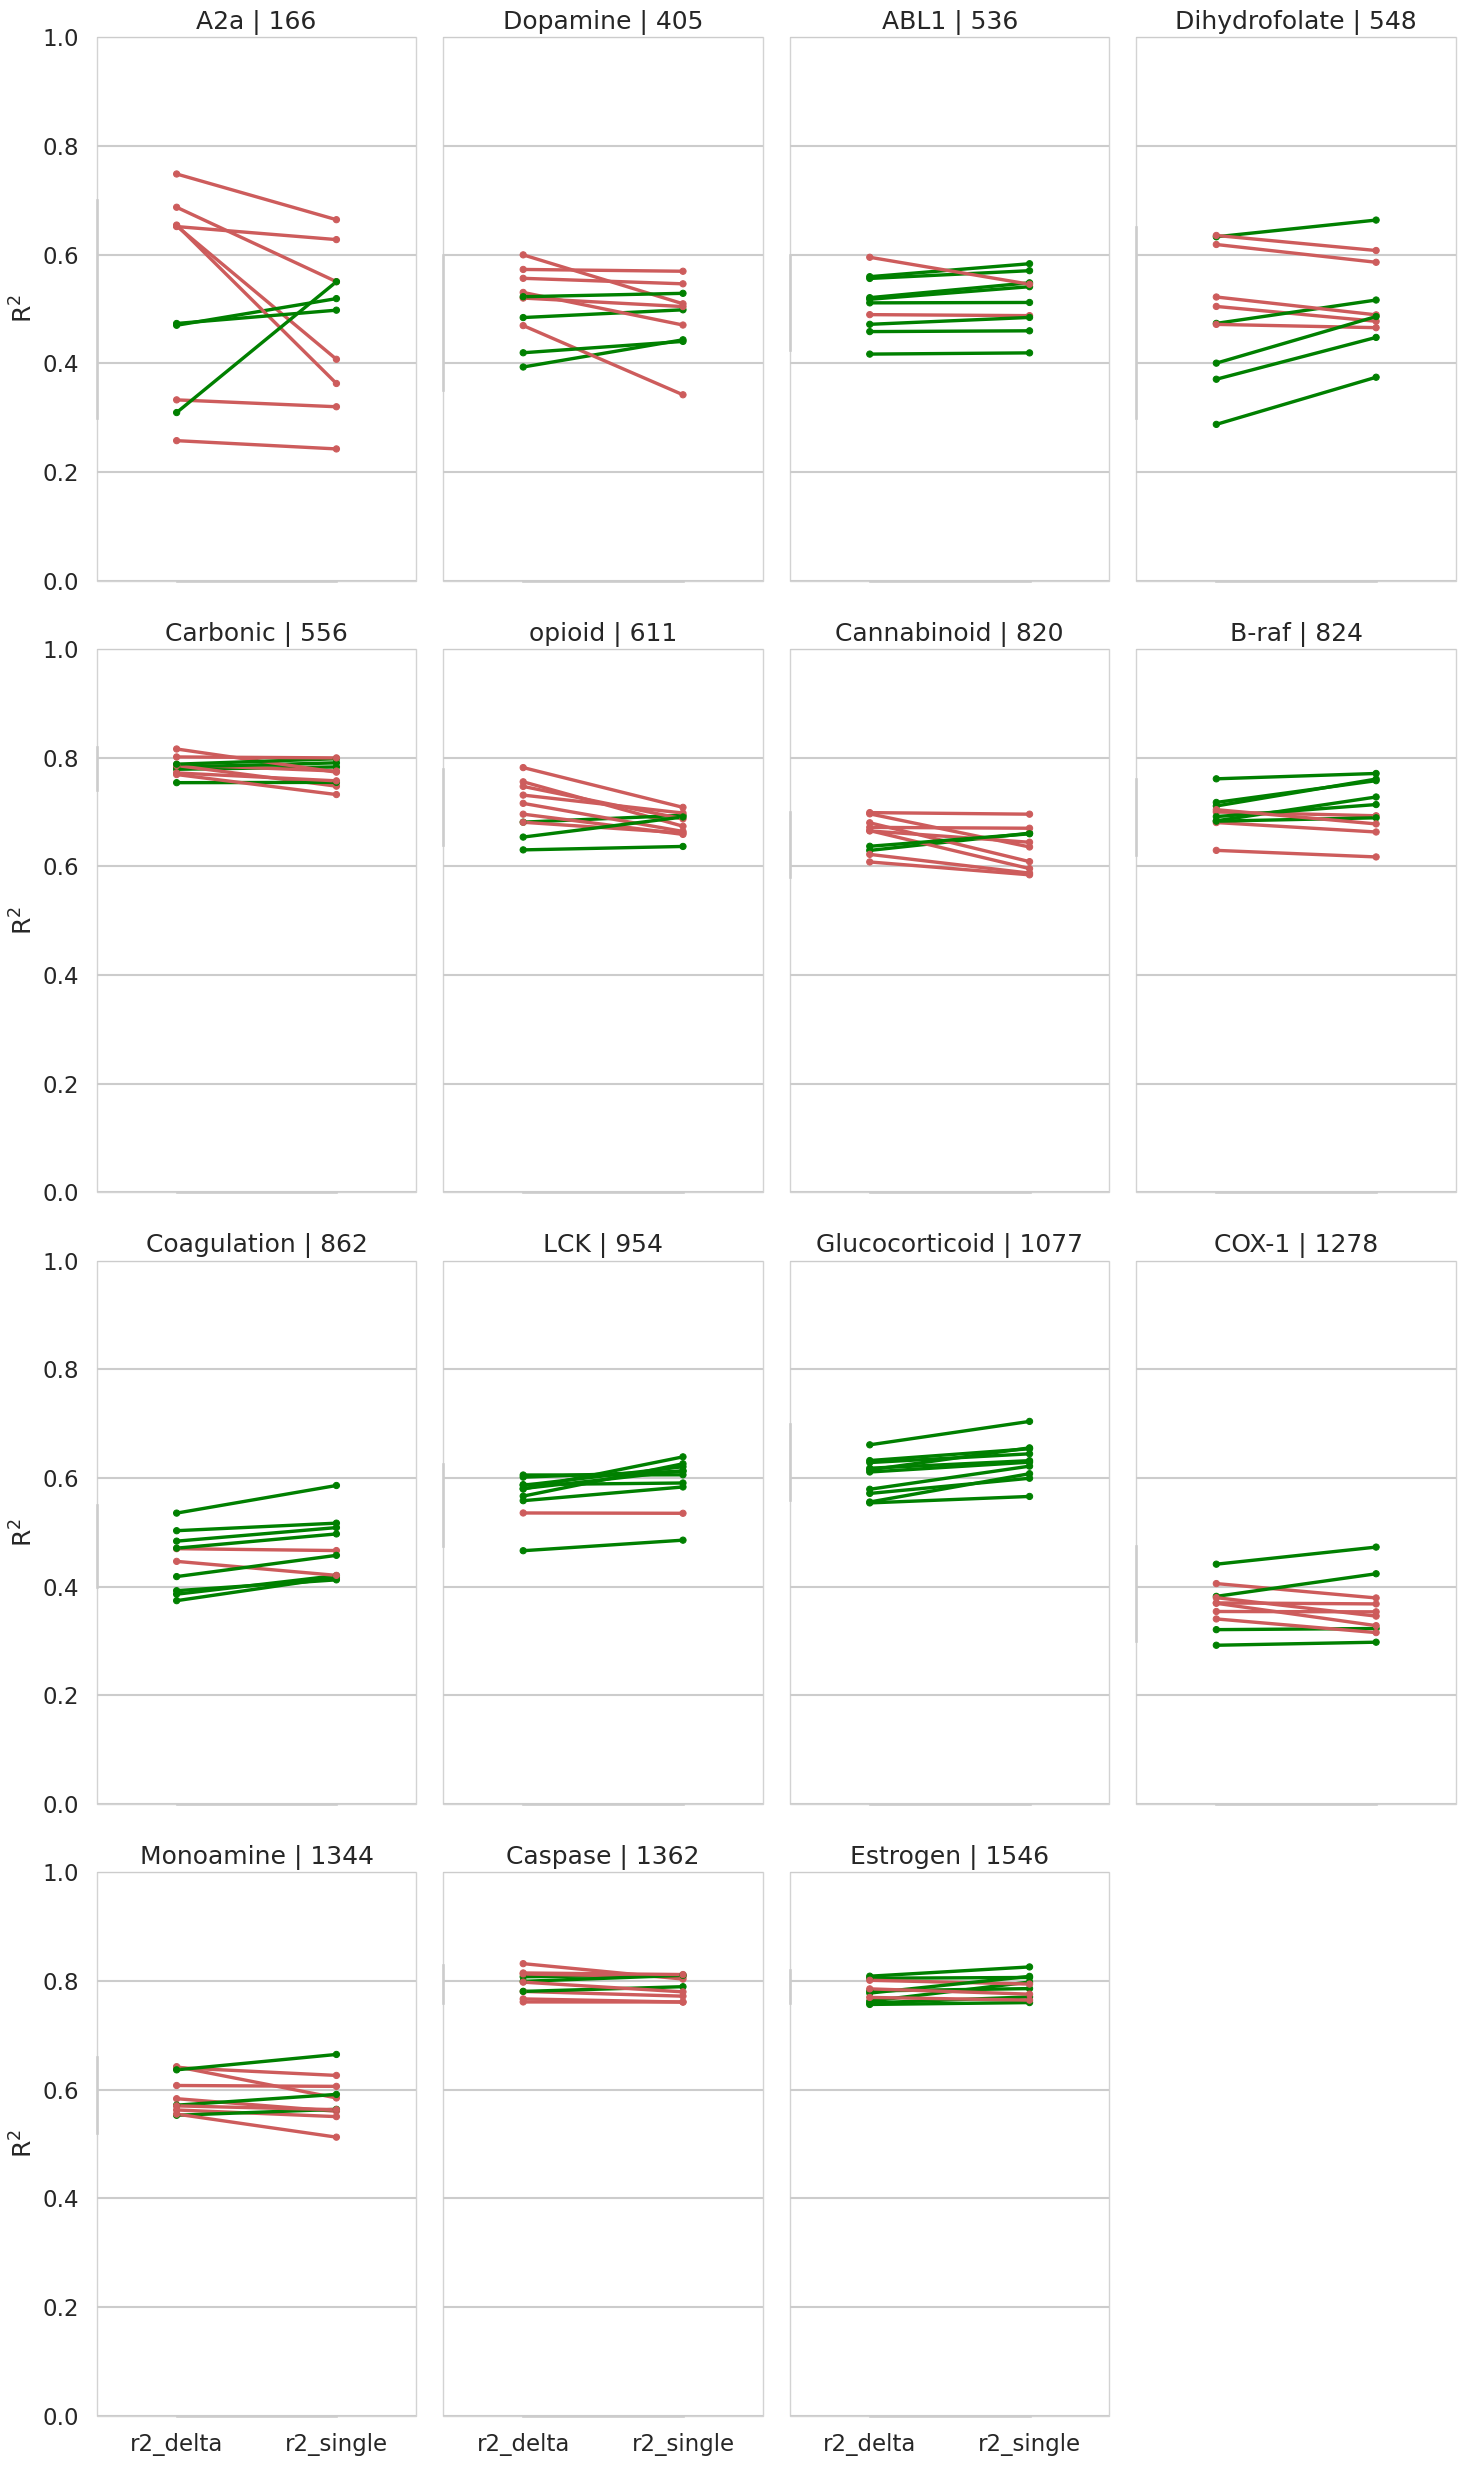

In [83]:
num_datasets = len(r2_melt_df.dataset.unique())
dataset_names = r2_melt_df.dataset.unique()
nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,25))
fig.delaxes(axes[3,3])
axes = axes.flatten()
last_row = nrows-1
for idx,(name, ax_id) in enumerate(zip(dataset_df.dataset.values,axes)):
    col = idx % ncols
    row = idx // ncols
    ax = plot_paired(data=r2_melt_df.query("dataset == @name"),dv="r2",within="method",subject="cycle",ax=ax_id,boxplot=False) 
    ax.set_title(f"{name} | {dataset_dict[name]}")
    ax.set_xlabel("")
    if idx % 4 == 0:
        y_label = "R$^2$"
    else:
        y_label = ""
    ax.set_yticks(np.arange(0,1.1,0.2))
    ax.set_ylabel(y_label)
    ax.set_ylim([0,1])
    if col != 0:
        ax.set_yticklabels([])
    if row != last_row:
        ax.set_xticks([]) 
    ax.patch.set_edgecolor('lightgrey')  
    ax.patch.set_linewidth(1)  
plt.tight_layout()

In [110]:
cohen_r2_list = []
for k,v in df.groupby("dataset"):
    r2_delta = v.r2_single.values-v.r2_delta.values
    d = np.mean(r2_delta)/np.std(r2_delta)
    prob_d = 0.25 * abs(d) + 0.5 
    if d < 0:
        prob_d = prob_d * -1.0
    cohen_r2_list.append([k,d, prob_d])
cohen_r2_df = pd.DataFrame(cohen_r2_list, columns=["dataset","cohen_D","prob"])

In [112]:
sns.set_style('whitegrid')
sns.set_context('notebook')

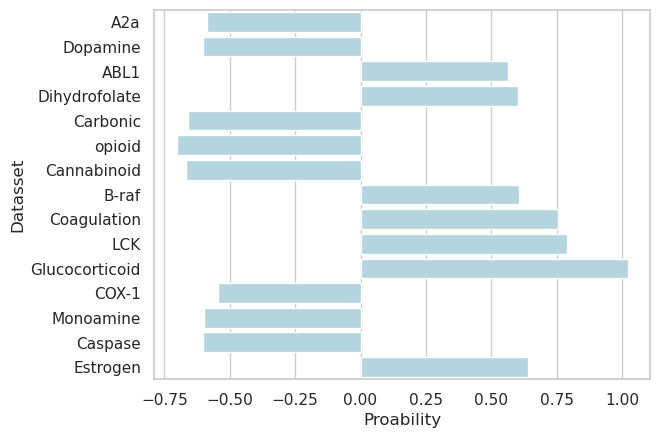

In [114]:
ax = sns.barplot(y="dataset",x="prob",data=cohen_r2_df,order=dataset_df.dataset,color="lightblue")
ax.set_xlabel("Proability")
ax.set_ylabel("Datasset");

In [115]:
cohen_rmse_list = []
for k,v in df.groupby("dataset"):
    r2_delta = v.rmse_single.values-v.rmse_delta.values
    d = np.mean(r2_delta)/np.std(r2_delta)
    prob_d = 0.25 * abs(d) + 0.5 
    if d < 0:
        prob_d = prob_d * -1.0
    cohen_rmse_list.append([k,d, prob_d])
cohen_rmse_df = pd.DataFrame(cohen_rmse_list, columns=["dataset","cohen_D","prob"])

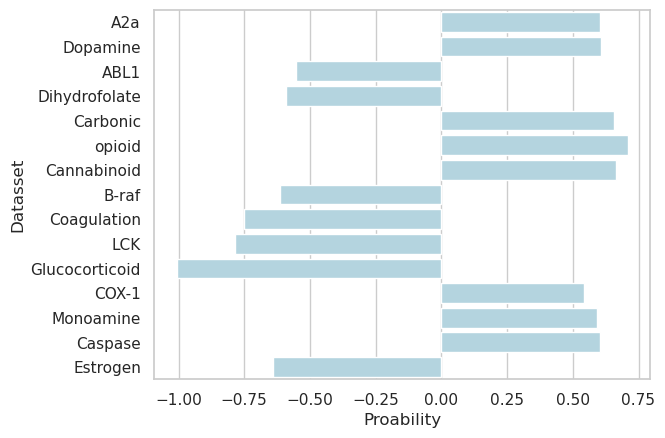

In [116]:
ax = sns.barplot(y="dataset",x="prob",data=cohen_rmse_df,order=dataset_df.dataset,color="lightblue")
ax.set_xlabel("Proability")
ax.set_ylabel("Datasset");